This notebook is used for experimental and analysis purpose of different models and choosing the best one for our hand gesture dataset. 

In [25]:
import numpy as np 
import pandas as pd 
import os 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [26]:

dataset_path = os.path.join(os.getcwd(), 'uWaveGestureLibrary')

coords = []
X = []
Y = []
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    for file in os.listdir(folder_path):
        if file[0].isalpha() and file.endswith('.txt'):
            gesture_index = int(file.split("-")[0][-1])
            df = pd.read_csv(os.path.join(folder_path,file), header=None, delimiter=" ")
            reshaped_df = df.values.flatten()
            coords.append(reshaped_df)
            Y.append(gesture_index)
            
            

In [27]:

max_length = max(len(seq) for seq in coords)
for i in range(len(coords)):
    array_length = len(coords[i])
    padding = np.zeros(max_length - array_length)
    coords[i] = np.concatenate((coords[i], padding))
X = np.array(coords)
y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1],1)))
model.add(Dense(9, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)


c:\Users\aayam\OneDrive\Dokumente\Celonis ML Challenge\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,481 (68.29 KB)

 Trainable params: 17,481 (68.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.1111 - loss: 2.1393 - val_accuracy: 0.1027 - val_loss: 2.0907
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.1251 - loss: 2.0886 - val_accuracy: 0.1172 - val_loss: 2.0930
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.1335 - loss: 2.0863 - val_accuracy: 0.1429 - val_loss: 2.0850
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.1246 - loss: 2.0856 - val_accuracy: 0.1172 - val_loss: 2.0811
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.1128 - loss: 2.0844 - val_accuracy: 0.1384 - val_loss: 2.0795
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.1229 - loss: 2.0841 - val_accuracy: 0.1429 - val_loss: 2.0832
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.1302 - loss: 2.0807 - val_accuracy: 0.1150 - val_loss: 2.0881
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.1326 - lo

In [28]:
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    GaussianNB(),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    ExtraTreeClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
    SVC()

    ]

RandomForestClassifier
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       117
           2       0.99      0.99      0.99       128
           3       0.97      0.99      0.98       103
           4       0.99      1.00      1.00       124
           5       0.95      0.99      0.97       105
           6       0.99      0.95      0.97       108
           7       0.99      0.97      0.98       119
           8       1.00      0.99      0.99        92

    accuracy                           0.98       896
   macro avg       0.98      0.98      0.98       896
weighted avg       0.98      0.98      0.98       896



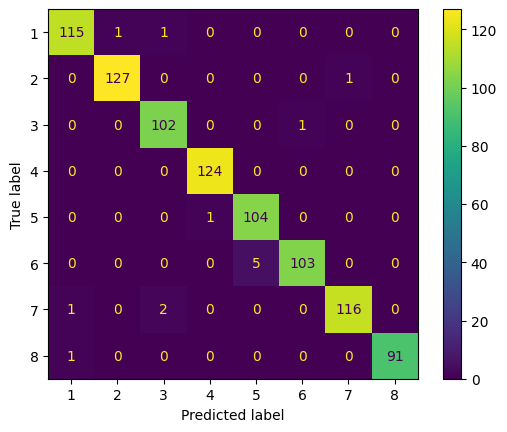

GaussianNB
              precision    recall  f1-score   support

           1       1.00      0.08      0.14       117
           2       1.00      0.32      0.49       128
           3       0.28      0.97      0.44       103
           4       0.14      0.01      0.02       124
           5       0.59      0.98      0.74       105
           6       0.75      0.41      0.53       108
           7       0.11      0.03      0.04       119
           8       0.25      0.60      0.35        92

    accuracy                           0.40       896
   macro avg       0.51      0.42      0.34       896
weighted avg       0.52      0.40      0.33       896



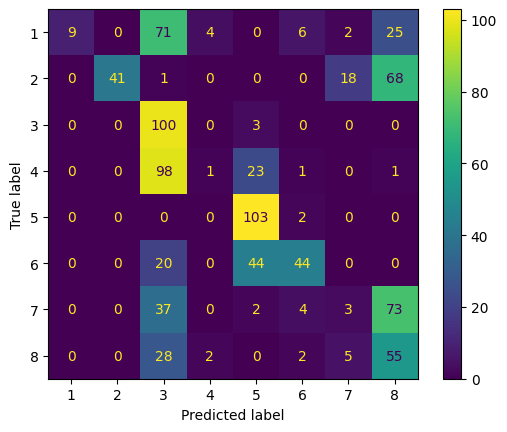

MLPClassifier
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       117
           2       0.98      0.97      0.98       128
           3       0.98      0.99      0.99       103
           4       0.99      1.00      1.00       124
           5       0.96      0.99      0.98       105
           6       0.97      0.97      0.97       108
           7       0.97      0.97      0.97       119
           8       1.00      1.00      1.00        92

    accuracy                           0.98       896
   macro avg       0.98      0.98      0.98       896
weighted avg       0.98      0.98      0.98       896



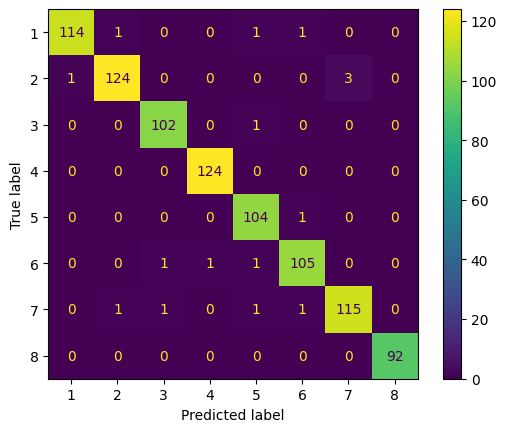

ExtraTreeClassifier
              precision    recall  f1-score   support

           1       0.84      0.85      0.85       117
           2       0.89      0.78      0.83       128
           3       0.82      0.86      0.84       103
           4       0.87      0.90      0.88       124
           5       0.89      0.91      0.90       105
           6       0.88      0.91      0.89       108
           7       0.81      0.77      0.79       119
           8       0.86      0.90      0.88        92

    accuracy                           0.86       896
   macro avg       0.86      0.86      0.86       896
weighted avg       0.86      0.86      0.86       896



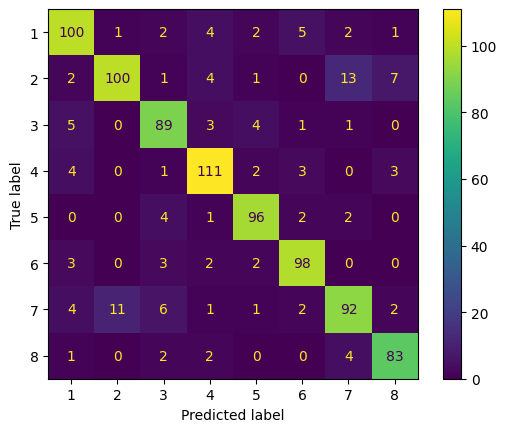

DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.92      0.83      0.87       117
           2       0.93      0.89      0.91       128
           3       0.85      0.91      0.88       103
           4       0.91      0.91      0.91       124
           5       0.88      0.94      0.91       105
           6       0.89      0.86      0.88       108
           7       0.90      0.87      0.89       119
           8       0.81      0.90      0.86        92

    accuracy                           0.89       896
   macro avg       0.89      0.89      0.89       896
weighted avg       0.89      0.89      0.89       896



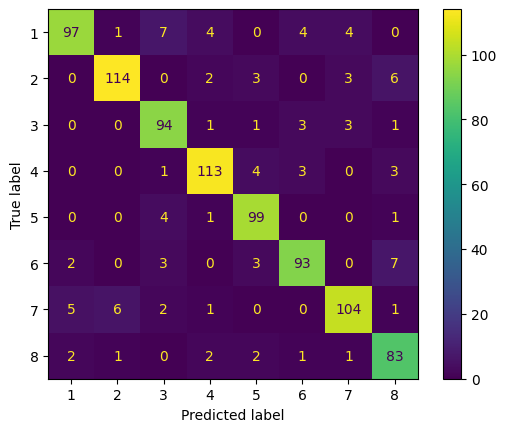

KNeighborsClassifier
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       117
           2       0.99      0.99      0.99       128
           3       0.99      1.00      1.00       103
           4       0.98      1.00      0.99       124
           5       0.97      0.99      0.98       105
           6       0.98      0.98      0.98       108
           7       0.99      0.98      0.99       119
           8       1.00      0.99      0.99        92

    accuracy                           0.99       896
   macro avg       0.99      0.99      0.99       896
weighted avg       0.99      0.99      0.99       896



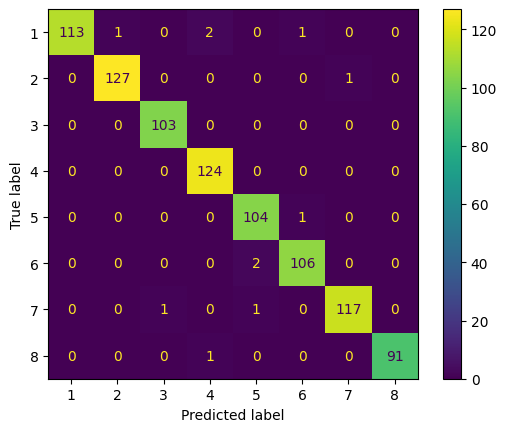

GradientBoostingClassifier
              precision    recall  f1-score   support

           1       0.91      0.90      0.90       117
           2       0.89      0.73      0.80       128
           3       0.89      0.87      0.88       103
           4       0.94      0.94      0.94       124
           5       0.66      0.90      0.76       105
           6       0.92      0.79      0.85       108
           7       0.84      0.81      0.82       119
           8       0.82      0.90      0.86        92

    accuracy                           0.85       896
   macro avg       0.86      0.85      0.85       896
weighted avg       0.86      0.85      0.85       896



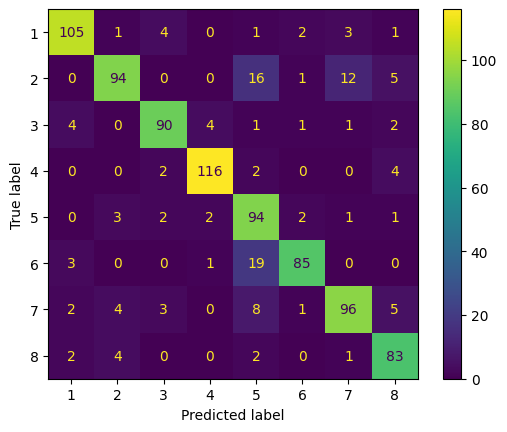

SVC
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       117
           2       0.98      0.99      0.99       128
           3       0.98      1.00      0.99       103
           4       0.99      0.99      0.99       124
           5       0.94      1.00      0.97       105
           6       1.00      0.94      0.97       108
           7       0.99      0.97      0.98       119
           8       1.00      1.00      1.00        92

    accuracy                           0.99       896
   macro avg       0.99      0.99      0.99       896
weighted avg       0.99      0.99      0.99       896



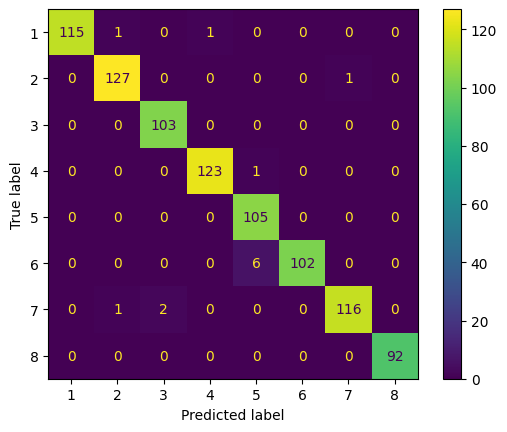

In [29]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    y_pred = clf.predict(X_test)
    print("="*30)
    print(name)
    print(classification_report(y_test, y_pred))

    class_labels = [1, 2, 3, 4, 5, 6, 7, 8]
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    cmd.plot()
    plt.show()
    

Observing both classification report and confusion matrix for 8 different classifier models, it can be seen that kMeans Classifier and Support Vector Classifier get the best result. 

The metrics Precision, Recall, f1 and Accuracy are both 99 percent for these two classifier models. Therefore it is safe to say any one out of two models is best option. I have chosen SVC for implementation since it works with labeled, supervised data better in many scenarios whereas k means is generally used for clustering tasks and makes use of this in classification task as well. 